In [ ]:
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import scipy.stats as stats

In [ ]:
androidListSamples = pd.read_csv("..\\..\\1-GettingQuestions\\samplesWithQuestions\\androidSamples.csv")
awsListSamples = pd.read_csv("..\\..\\1-GettingQuestions\\samplesWithQuestions\\awsSamples.csv")
azureListSamples = pd.read_csv("..\\..\\1-GettingQuestions\\samplesWithQuestions\\azureSamples.csv")
springListSamples = pd.read_csv("..\\..\\1-GettingQuestions\\samplesWithQuestions\\springSamples.csv")

In [ ]:
def dealWithData(listSamples):    
    listSamples["windowsPath"] = listSamples["path"].str.replace("/", "\\")
    
    allSamples = [pd.read_csv("..\\..\\2-ExtractingMetrics\\metrics\\"+sample+".csv", parse_dates=True) for sample in listSamples["windowsPath"]]

    allSamplesMetrics = pd.concat(allSamples, axis=0, ignore_index=True)

    del allSamplesMetrics["Kind"]
    del allSamplesMetrics["Name"]

    allSamplesMetrics

    allSamplesMetrics['commitDate'] = pd.to_datetime(allSamplesMetrics['commitDate'].astype(str).str[:-6])

    allSamplesMetrics.sort_values(by="commitDate", inplace=True)

    allSamplesMetrics.set_index(allSamplesMetrics["commitDate"], inplace=True)

    allSamplesMetrics.index

    del allSamplesMetrics["commitDate"]
    
    print(allSamplesMetrics.shape)
    
    allSamplesMetrics = allSamplesMetrics.groupby([(allSamplesMetrics.index.year), (allSamplesMetrics.index.month)]).mean()
    
    return allSamplesMetrics

# Total of commits

In [ ]:
androidSamples = dealWithData(androidListSamples)
awsSamples = dealWithData(awsListSamples)
azureSamples = dealWithData(azureListSamples)
springSamples = dealWithData(springListSamples)

## Carregando as métricas das perguntas do Stack Overflow

In [ ]:
androidQuestions = pd.read_csv("..\\..\\1-GettingQuestions\\questions\\androidQuestions.csv", parse_dates=True)
awsQuestions = pd.read_csv("..\\..\\1-GettingQuestions\\questions\\awsQuestions.csv", parse_dates=True)
azureQuestions = pd.read_csv("..\\..\\1-GettingQuestions\\questions\\azureQuestions.csv", parse_dates=True)
springQuestions = pd.read_csv("..\\..\\1-GettingQuestions\\questions\\springQuestions.csv", parse_dates=True)

# Number of Questions

In [ ]:
androidQuestions.shape

In [ ]:
awsQuestions.shape

In [ ]:
azureQuestions.shape

In [ ]:
springQuestions.shape

In [ ]:
# df_stackoverflow = pd.concat([androidQuestions, awsQuestions, azureQuestions, springQuestions], axis=0, ignore_index=True)

In [ ]:
def dealWithQuestions(questions):
    questions['creationDate'] = pd.to_datetime(questions['creationDate'])
    questions.sort_values(by="creationDate", inplace=True)
    questions.set_index(questions['creationDate'], inplace=True)
    questions["count_questions"] = 1
    questions=questions.groupby([(questions.index.year), (questions.index.month)]).sum()
    return questions

In [ ]:
androidQuestions = dealWithQuestions(androidQuestions)
awsQuestions = dealWithQuestions(awsQuestions)
azureQuestions = dealWithQuestions(azureQuestions)
springQuestions = dealWithQuestions(springQuestions)

## Datasets Join

In [ ]:
def join(metrics, questions):
    df = pd.concat([metrics,questions], axis=1)
    df["count_questions"].fillna(0, inplace=True)
    df.fillna(method="ffill", inplace=True)
    return df

In [ ]:
dfAndroid = join(androidSamples, androidQuestions)
dfAws = join(awsSamples, awsQuestions)
dfAzure = join(azureSamples, azureQuestions)
dfSpring = join(springSamples, springQuestions)

## Normalização dos dados

In [ ]:
def normalize(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [ ]:
dfAndroidNormalized = normalize(dfAndroid)
dfAwsNormalized = normalize(dfAws)
dfAzureNormalized = normalize(dfAzure)
dfSpringNormalized = normalize(dfSpring)

### Gráfico do número de arquivos Java

In [ ]:
def dealWithDate(df):
    time = pd.DataFrame(df.index.values.tolist(), columns=['year','month'])
    time["day"] = 1
    df.set_index(pd.to_datetime(time), inplace=True)

In [ ]:
dealWithDate(dfAndroidNormalized)
dealWithDate(dfAwsNormalized)
dealWithDate(dfAzureNormalized)
dealWithDate(dfSpringNormalized)

# Plotting metrics and questions

In [ ]:
def plot(metrics, questions, metric, title, ylabel, xlabel):
    subplot = metrics.plot(figsize=(15,5), fontsize=20, legend=True, label=metric)
    subplot = questions.plot(figsize=(15,5), fontsize=20, legend=True, label="Questions")
    subplot.set_title(title, fontsize=25)
    subplot.set_ylabel(ylabel, fontsize=20)
    subplot.set_xlabel(xlabel, fontsize=20)
    #     subplot.figure.savefig(metric+".pdf",bbox_inches = 'tight')

In [ ]:
plot(normalized_df["AvgCyclomatic"], normalized_df["count_questions"], "AvgCyclomatic", "AvgCyclomatic", "", "")

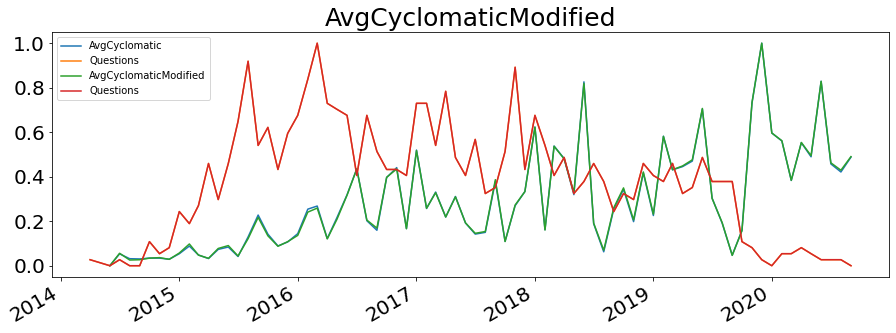

In [128]:
plot(normalized_df["AvgCyclomaticModified"], normalized_df["count_questions"], "AvgCyclomaticModified", "AvgCyclomaticModified", "", "")

In [ ]:
plot(normalized_df["AvgCyclomaticStrict"], normalized_df["count_questions"], "AvgCyclomaticStrict", "AvgCyclomaticStrict", "", "")

In [ ]:
plot(normalized_df["AvgEssential"], normalized_df["count_questions"], "AvgEssential", "AvgEssential", "", "")

In [ ]:
plot(normalized_df["AvgLine"], normalized_df["count_questions"], "AvgLine", "AvgLine", "", "")

In [ ]:
plot(normalized_df["AvgLineBlank"], normalized_df["count_questions"], "AvgLineBlank", "AvgLineBlank", "", "")

In [ ]:
plot(normalized_df["AvgLineCode"], normalized_df["count_questions"], "AvgLineCode", "AvgLineCode", "", "")

In [ ]:
plot(normalized_df["AvgLineComment"], normalized_df["count_questions"], "AvgLineComment", "AvgLineComment", "", "")

In [ ]:
plot(normalized_df["CountClassBase"], normalized_df["count_questions"], "CountClassBase", "CountClassBase", "", "")

In [ ]:
plot(normalized_df["CountClassCoupled"], normalized_df["count_questions"], "CountClassCoupled", "CountClassCoupled", "", "")

In [ ]:
plot(normalized_df["CountClassCoupledModified"], normalized_df["count_questions"], "CountClassCoupledModified", "CountClassCoupledModified", "", "")

In [ ]:
plot(normalized_df["CountClassDerived"], normalized_df["count_questions"], "CountClassDerived", "CountClassDerived", "", "")

In [ ]:
plot(normalized_df["CountDeclClassMethod"], normalized_df["count_questions"], "CountDeclClassMethod", "CountDeclClassMethod", "", "")

In [ ]:
plot(normalized_df["CountDeclClassVariable"], normalized_df["count_questions"], "CountDeclClassVariable", "CountDeclClassVariable", "", "")

In [ ]:
plot(normalized_df["CountDeclInstanceMethod"], normalized_df["count_questions"], "CountDeclInstanceMethod", "CountDeclInstanceMethod", "", "")

In [ ]:
plot(normalized_df["CountDeclInstanceVariable"], normalized_df["count_questions"], "CountDeclInstanceVariable", "CountDeclInstanceVariable", "", "")

In [ ]:
plot(normalized_df["CountDeclMethod"], normalized_df["count_questions"], "CountDeclMethod", "CountDeclMethod", "", "")

In [ ]:
plot(normalized_df["CountDeclMethodAll"], normalized_df["count_questions"], "CountDeclMethodAll", "CountDeclMethodAll", "", "")

In [ ]:
plot(normalized_df["CountDeclMethodDefault"], normalized_df["count_questions"], "CountDeclMethodDefault", "CountDeclMethodDefault", "", "")

In [ ]:
plot(normalized_df["CountDeclMethodPrivate"], normalized_df["count_questions"], "CountDeclMethodPrivate", "CountDeclMethodPrivate", "", "")

In [ ]:
plot(normalized_df["CountDeclMethodProtected"], normalized_df["count_questions"], "CountDeclMethodProtected", "CountDeclMethodProtected", "", "")

In [ ]:
plot(normalized_df["CountDeclMethodPublic"], normalized_df["count_questions"], "CountDeclMethodPublic", "CountDeclMethodPublic", "", "")

In [ ]:
plot(normalized_df["CountLine"], normalized_df["count_questions"], "CountLine", "CountLine", "", "")

In [ ]:
plot(normalized_df["CountLineBlank"], normalized_df["count_questions"], "CountLineBlank", "CountLineBlank", "", "")

In [ ]:
plot(normalized_df["CountLineCode"], normalized_df["count_questions"], "CountLineCode", "CountLineCode", "", "")

In [ ]:
plot(normalized_df["CountLineCodeDecl"], normalized_df["count_questions"], "CountLineCodeDecl", "CountLineCodeDecl", "", "")

In [ ]:
plot(normalized_df["CountLineCodeExe"], normalized_df["count_questions"], "CountLineCodeExe", "CountLineCodeExe", "", "")

In [ ]:
plot(normalized_df["CountLineComment"], normalized_df["count_questions"], "CountLineComment", "CountLineComment", "", "")

In [ ]:
plot(normalized_df["CountStmt"], normalized_df["count_questions"], "CountStmt", "CountStmt", "", "")

In [ ]:
plot(normalized_df["CountStmtDecl"], normalized_df["count_questions"], "CountStmtDecl", "CountStmtDecl", "", "")

In [ ]:
plot(normalized_df["CountStmtExe"], normalized_df["count_questions"], "CountStmtExe", "CountStmtExe", "", "")

In [ ]:
plot(normalized_df["MaxCyclomatic"], normalized_df["count_questions"], "MaxCyclomatic", "MaxCyclomatic", "", "")

In [ ]:
plot(normalized_df["MaxCyclomaticModified"], normalized_df["count_questions"], "MaxCyclomaticModified", "MaxCyclomaticModified", "", "")

In [ ]:
plot(normalized_df["MaxCyclomaticStrict"], normalized_df["count_questions"], "MaxCyclomaticStrict", "MaxCyclomaticStrict", "", "")

In [ ]:
plot(normalized_df["MaxEssential"], normalized_df["count_questions"], "MaxEssential", "MaxEssential", "", "")

In [ ]:
plot(normalized_df["MaxInheritanceTree"], normalized_df["count_questions"], "MaxInheritanceTree", "MaxInheritanceTree", "", "")

In [ ]:
plot(normalized_df["MaxNesting"], normalized_df["count_questions"], "MaxNesting", "MaxNesting", "", "")

In [ ]:
plot(normalized_df["PercentLackOfCohesion"], normalized_df["count_questions"], "PercentLackOfCohesion", "PercentLackOfCohesion", "", "")

In [ ]:
plot(normalized_df["PercentLackOfCohesionModified"], normalized_df["count_questions"], "PercentLackOfCohesionModified", "PercentLackOfCohesionModified", "", "")

In [ ]:
plot(normalized_df["RatioCommentToCode"], normalized_df["count_questions"], "RatioCommentToCode", "RatioCommentToCode", "", "")

In [ ]:
plot(normalized_df["SumCyclomatic"], normalized_df["count_questions"], "SumCyclomatic", "SumCyclomatic", "", "")

In [ ]:
plot(normalized_df["SumCyclomaticModified"], normalized_df["count_questions"], "SumCyclomaticModified", "SumCyclomaticModified", "", "")

In [ ]:
plot(normalized_df["SumCyclomaticStrict"], normalized_df["count_questions"], "SumCyclomaticStrict", "SumCyclomaticStrict", "", "")

In [ ]:
plot(normalized_df["SumEssential"], normalized_df["count_questions"], "SumEssential", "SumEssential", "", "")